In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('../data/processed/nacional.csv')

C:\Users\isaij\AppData\Local\Temp\ipykernel_33760\3513714135.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/nacional.csv')


**180,219 datos de 49 columnas**
Año 2019 únicamente

**Columnas destacables**:
- TIPACCID (Tipo de accidente):
     - 0: Certificado 0
     - 1: Colisión con vehículo automotor
     - 2: Colisión con peatón (atropellamiento)
     - 3: Colisión con animal
     - 4: Colisión con objeto fijo
     - 5: Volcadura
     - 6: Caída de pasajero
     - 7: Salida del camino
     - 8: Incendio
     - 9: Colisión con ferrocarril
     - 10: Colisión con motocicleta
     - 11: Colisión con ciclista
     - 12: Otro
- CAUSAACCI (Causa de accidente)
    - 1: Conductor 
    - 2: Peatón o pasajero
    - 3: Falla de vehículo
    - 4: Mala condición del camino
    - 5: Otra
- CAPAROD (Capa de rodamiento)
    - 1: Pavimentada
    - 2: No pavimentada
- SEXO
    - 1: Se fugó
    - 2: Hombre
    - 3: Mujer
- ALIENTO
- HERIDOS, MUERTOS
- CLASE
    - 1: Fatal 
    - 2: No fatal
    - 3: Sólo daños

In [43]:
df = df.drop('ID', axis=1)
df = df.drop('CALLE2', axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180219 entries, 0 to 180218
Data columns (total 46 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   EDO         180219 non-null  int64  
 1   MES         180219 non-null  int64  
 2   ANIO        180219 non-null  int64  
 3   MPIO        180219 non-null  int64  
 4   HORA        180219 non-null  int64  
 5   MINUTOS     180219 non-null  int64  
 6   DIA         180219 non-null  int64  
 7   DIASEMANA   180219 non-null  int64  
 8   URBANA      180219 non-null  int64  
 9   SUBURBANA   180219 non-null  int64  
 10  TIPACCID    180219 non-null  int64  
 11  AUTOMOVIL   180219 non-null  int64  
 12  CAMPASAJ    180219 non-null  int64  
 13  MICROBUS    180219 non-null  int64  
 14  PASCAMION   180219 non-null  int64  
 15  OMNIBUS     180219 non-null  int64  
 16  TRANVIA     180219 non-null  int64  
 17  CAMIONETA   180219 non-null  int64  
 18  CAMION      180219 non-null  int64  
 19  TR

In [45]:
df.shape

(180219, 46)

In [46]:
from IPython.display import display, HTML

def create_scrolleable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height: 220px; overflow: auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [47]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrolleable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
EDO,180219.0,16.373285,7.100668,1.00000,11.00000,19.00000,19.00000,32.00000
MES,180219.0,6.545558,3.477758,1.00000,3.00000,7.00000,10.00000,12.00000
ANIO,180219.0,2019.000000,0.000000,2019.00000,2019.00000,2019.00000,2019.00000,2019.00000
MPIO,180219.0,32.148148,30.395565,1.00000,14.00000,26.00000,39.00000,193.00000
HORA,180219.0,12.750037,5.932928,0.00000,8.00000,13.00000,18.00000,23.00000
MINUTOS,180219.0,25.999723,17.756017,0.00000,10.00000,27.00000,40.00000,59.00000
DIA,180219.0,15.630733,8.798444,1.00000,8.00000,15.00000,23.00000,31.00000
DIASEMANA,180219.0,3.972334,1.966724,1.00000,2.00000,4.00000,6.00000,7.00000
URBANA,180219.0,1.019510,0.206587,0.00000,1.00000,1.00000,1.00000,2.00000
SUBURBANA,180219.0,0.026157,0.248610,0.00000,0.00000,0.00000,0.00000,3.00000


In [48]:
df.describe(include=['O'])

,CALLE1
count,180219
unique,22981
top,AVENIDA EUGENIO GARZA SADA
freq,1907


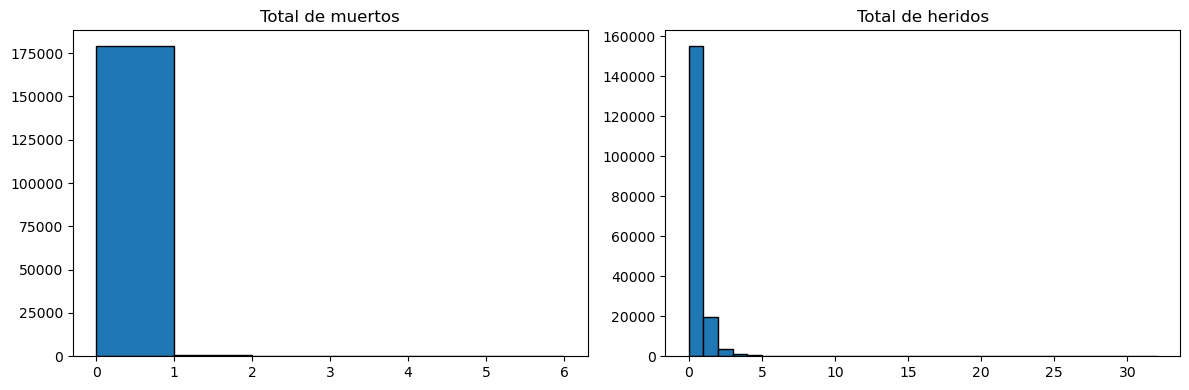

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['TOTMUERTOS'], bins=6, edgecolor='black')
axes[0].set_title("Total de muertos")

axes[1].hist(df['TOTHERIDOS'], bins=32, edgecolor='black')
axes[1].set_title("Total de heridos")

plt.tight_layout()
plt.show()

In [135]:
death_month = df.groupby('MES')['TOTMUERTOS'].sum()
death_weekday = df.groupby('DIASEMANA')['TOTMUERTOS'].sum()
death_day = df.groupby('DIA')['TOTMUERTOS'].sum()

injured_month = df.groupby('MES')['TOTHERIDOS'].sum()
injured_weekday = df.groupby('DIASEMANA')['TOTHERIDOS'].sum()
injured_day = df.groupby('DIA')['TOTHERIDOS'].sum()

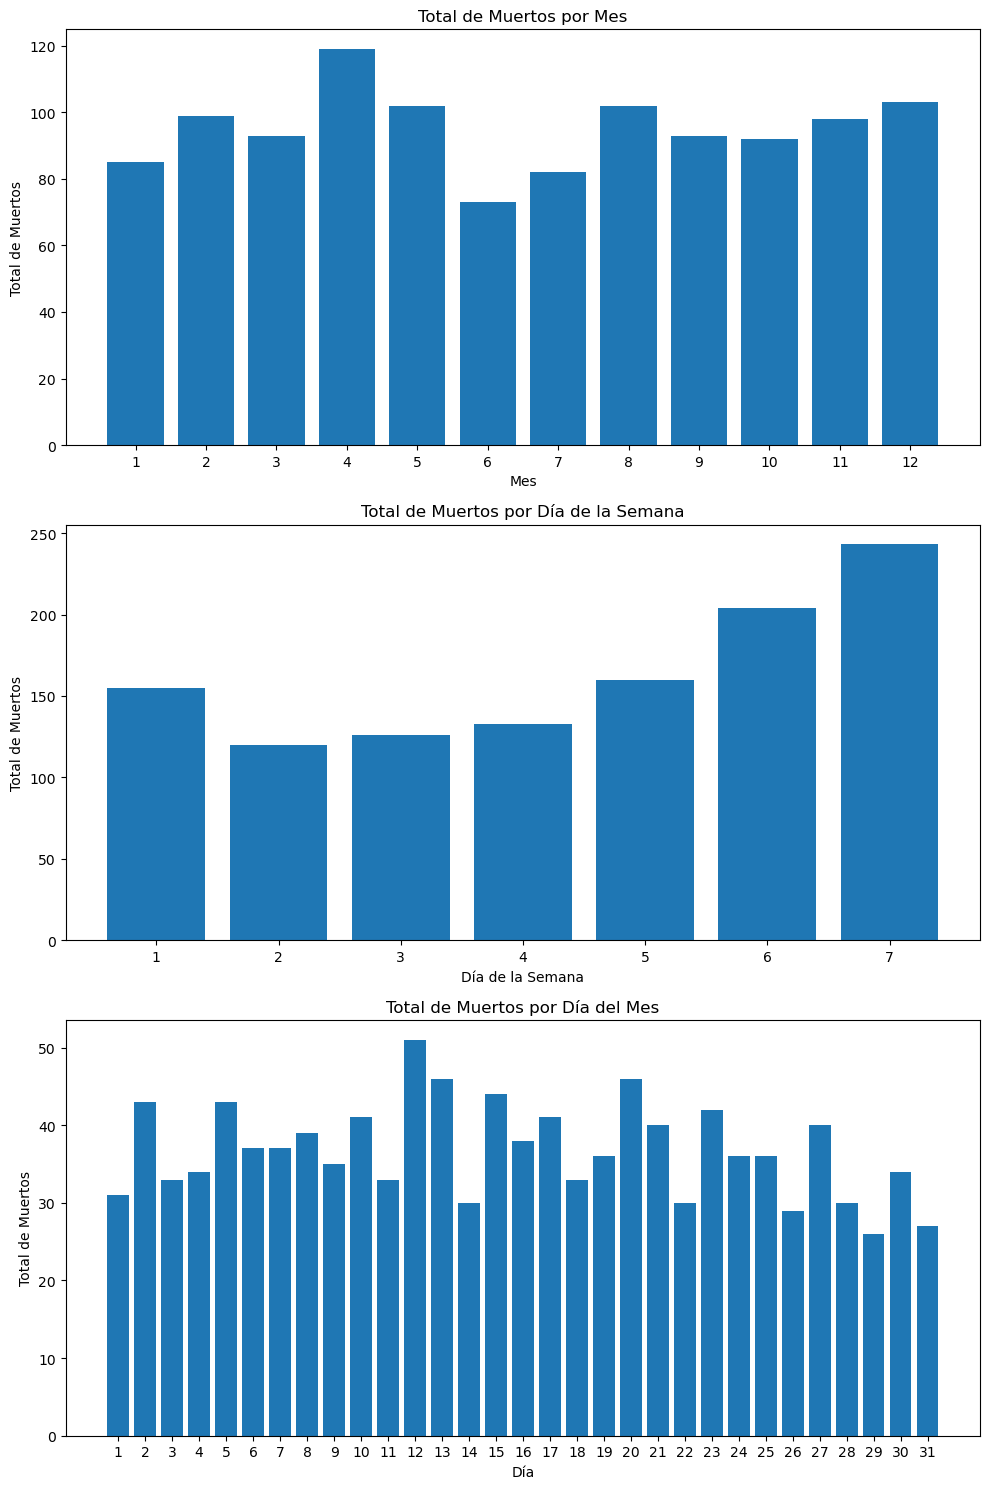

In [141]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].bar(death_month.index, death_month.values)
axes[0].set_title('Total de Muertos por Mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Total de Muertos')
axes[0].set_xticks(range(1, 13))

axes[1].bar(death_weekday.index, death_weekday.values)
axes[1].set_title('Total de Muertos por Día de la Semana')
axes[1].set_xlabel('Día de la Semana')
axes[1].set_ylabel('Total de Muertos')
axes[1].set_xticks(range(1, 8))

axes[2].bar(death_day.index, death_day.values)
axes[2].set_title('Total de Muertos por Día del Mes')
axes[2].set_xlabel('Día')
axes[2].set_ylabel('Total de Muertos')
axes[2].set_xticks(range(1, 32))

plt.tight_layout()
plt.show()